# Лабораторная работа №1: Точечные отображения
**Выполнили:** Студенты группы [J3119] Ярошенко Виталий Эдуардович (505278) и Кокорев Павел Сергеевич (489536)
**Вариант:** N = 2  
**Функция:** $g(x_n) = r x_n (1 - x_n)^2$, где $r \in [0; 6.75]$

# Easy Level: Теоритическое введение

### E.1 Доказательство ограниченности логистического отображения
**Задание:** Докажите, что $\forall n \in \mathbb{N}, \forall r \in [0;1]$, если $0 < x_0 < 1$, то $0 < x_n < 1$.

**Доказательство:**
Рассмотрим функцию логистического отображения:
$$f(x) = r x (1 - x)$$

1.  **Нижняя граница ($x_{n+1} > 0$):**
    Так как $x_n \in (0; 1)$, то $x_n > 0$ и $(1 - x_n) > 0$.
    Параметр $r \ge 0$.
    Следовательно, произведение $x_{n+1} = r \cdot x_n \cdot (1 - x_n) > 0$ (при $r>0$).

2.  **Верхняя граница ($x_{n+1} < 1$):**
    Найдем максимум функции $h(x) = x(1-x)$ на отрезке $[0; 1]$.
    Это парабола ветвями вниз. Вершина находится в точке:
    $$x_{vert} = \frac{-b}{2a} = \frac{-1}{-2} = 0.5$$
    Значение в вершине:
    $$h(0.5) = 0.5 \cdot (1 - 0.5) = 0.25$$
    Таким образом, $x_n(1-x_n) \le 0.25$ для любого $x$.
    
    Подставим это в исходное уравнение:
    $$x_{n+1} = r \cdot h(x_n) \le r \cdot 0.25$$
    
    По условию задачи $r \in [0; 1]$. Значит:
    $$x_{n+1} \le 1 \cdot 0.25 = 0.25 < 1$$

**Вывод:** Значение $x_n$ никогда не покидает интервал $(0; 1)$.

### E.2 Влияние параметра $r$ на классическое логистическое отображение 

**Классическая функция отображения:**
$$x_{n+1} = f(x_n) = r x_n (1 - x_n)$$

### Вывод:
1.  **Форма и симметрия:** Функция $f(x_n)$ всегда является **симметричной параболой**, ветви которой направлены вниз. Вершина параболы (максимум) всегда находится в точке $x_n = 0.5$ и не зависит от $r$.
2.  **Масштабирующий фактор:** Параметр **$r$** является **масштабирующим множителем** (коэффициентом роста популяции). Он определяет **высоту** параболы $f(x_n)$.
3.  **Критические значения $r$:**
    * **$r \in [0; 1]$:** Кривая лежит ниже биссектрисы $y=x$. Система **монотонно сходится к $0$** (вымирание).
    * **$r \in (1; 4]$:** Кривая пересекает биссектрису $y=x$, и система становится **нелинейной**. Именно $r$ определяет, будет ли это устойчивая неподвижная точка, цикл, или хаос.
    * **$r = 4$:** Вершина параболы достигает максимальной высоты $y=1$. Это **граница хаоса** для классического отображения.

Таким образом, $r$ контролирует **амплитуду** (высоту) кривой, которая в свою очередь определяет **динамический режим** системы: от устойчивости к хаосу.

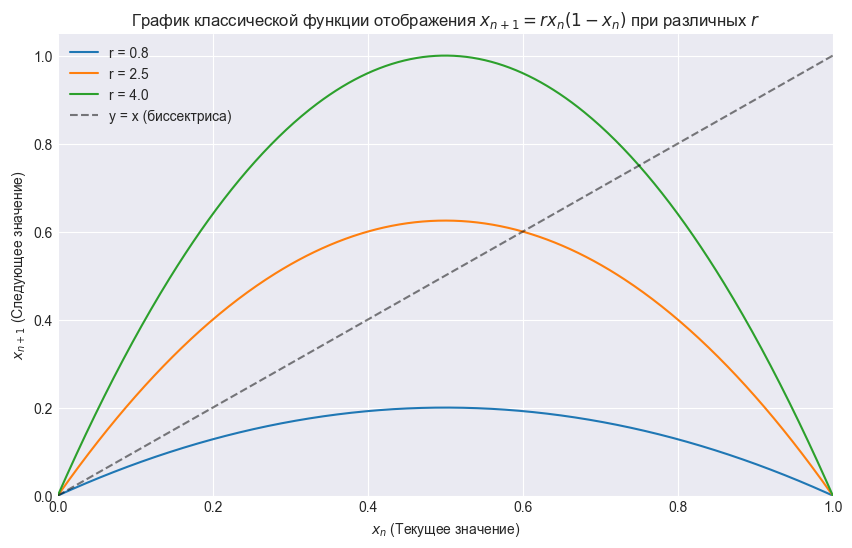

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем классическое логистическое отображение
def logistic_map(x, r):
    return r * x * (1 - x)

# 1. Задаем массив точек xn от 0 до 1
x_values = np.linspace(0, 1, 500)

# 2. Выбираем несколько значений r, демонстрирующих разные режимы:
r_list = [0.8, 2.5, 4.0] # 0.8: сходимость к 0; 2.5: устойчивая точка; 4.0: хаос

plt.figure(figsize=(10, 6))

# Рисуем графики для каждого r
for r in r_list:
    y_values = logistic_map(x_values, r)
    plt.plot(x_values, y_values, label=f'r = {r}')

# 3. Добавляем диагональ y = x (биссектрису)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='y = x (биссектриса)')

# Оформление
plt.title('График классической функции отображения $x_{n+1} = r x_n (1 - x_n)$ при различных $r$')
plt.xlabel('$x_n$ (Текущее значение)')
plt.ylabel('$x_{n+1}$ (Следующее значение)')
plt.grid(True)
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1.05)
plt.show()

### Анализ функции варианта N=2
**Функция:** $g(x) = r x (1 - x)^2$

Исследуем поведение функции, чтобы найти её максимум и обосновать диапазон параметра $r \in [0; 6.75]$. Найдем производную по $x$:
$$g'(x) = r \left( (1-x)^2 + x \cdot 2(1-x) \cdot (-1) \right)$$
$$g'(x) = r (1-x) \left( (1-x) - 2x \right)$$
$$g'(x) = r (1-x) (1 - 3x)$$

Приравняем производную к нулю для поиска экстремумов:
1.  $1 - x = 0 \Rightarrow x = 1$ (минимум, $g(1)=0$)
2.  $1 - 3x = 0 \Rightarrow x = \frac{1}{3}$ (максимум)

Найдем значение функции в точке максимума $x = 1/3$:
$$g(1/3) = r \cdot \frac{1}{3} \cdot \left(1 - \frac{1}{3}\right)^2 = r \cdot \frac{1}{3} \cdot \frac{4}{9} = r \cdot \frac{4}{27}$$

Чтобы отображение не выходило за пределы отрезка $[0; 1]$, должно выполняться условие $g(x_{max}) \le 1$:
$$r \cdot \frac{4}{27} \le 1 \Rightarrow r \le \frac{27}{4} = 6.75$$

**Вывод:** Максимум функции смещен влево (в точку $1/3$) по сравнению с классическим логистическим отображением (где максимум в $1/2$).

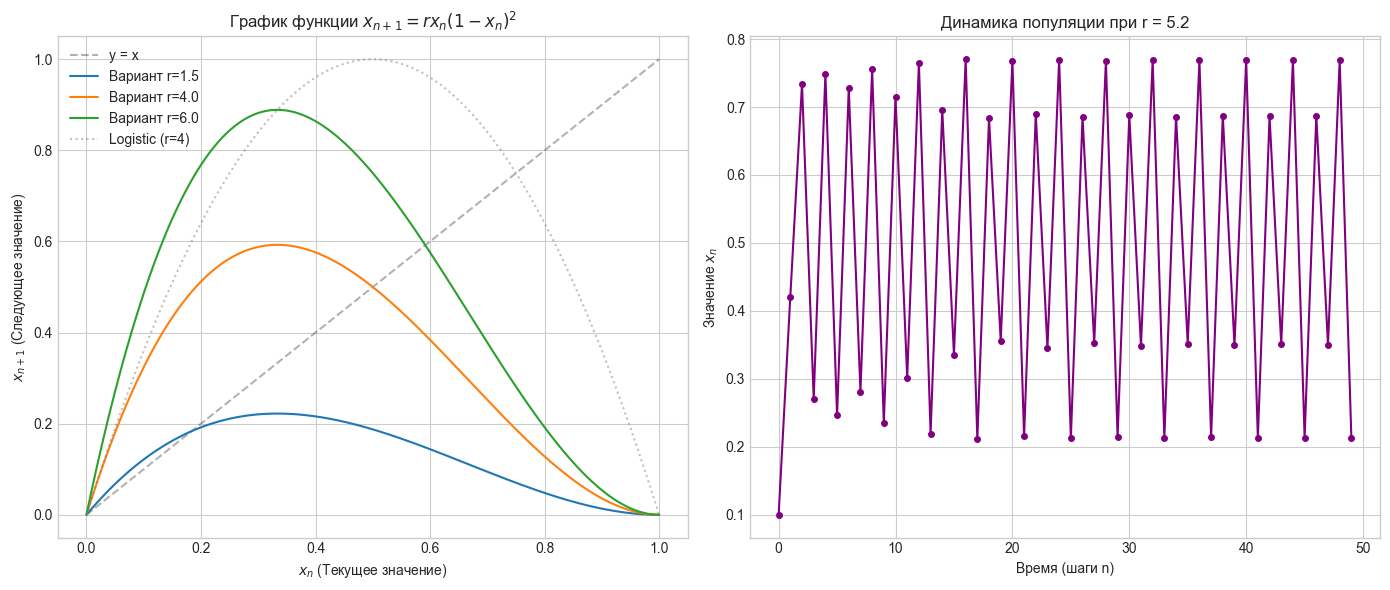

In [10]:
### Задание E.3.1 Построение графиков
import numpy as np
import matplotlib.pyplot as plt

# Настройка стиля
plt.style.use('seaborn-v0_8-whitegrid')

# --- 1. Определение функций ---
def variant_map(x, r):
    """Функция твоего варианта: r * x * (1 - x)^2"""
    return r * x * ((1 - x)**2)

def logistic_map(x, r):
    """Стандартное логистическое отображение для сравнения"""
    return r * x * (1 - x)

# --- 2. Подготовка данных ---
x_val = np.linspace(0, 1, 400)

# Выберем значения r:
# r_low:  вымирание или малое значение
# r_mid:  стабильность
# r_high: близко к максимуму (хаос или сложные циклы)
r_values = [1.5, 4.0, 6.0] 

plt.figure(figsize=(14, 6))

# --- График А: Функция отображения (Карта) ---
plt.subplot(1, 2, 1)

# Рисуем биссектрису y = x (линия, где популяция не меняется)
plt.plot(x_val, x_val, 'k--', alpha=0.3, label='y = x')

# Рисуем кривые для разных r
for r in r_values:
    y_val = variant_map(x_val, r)
    plt.plot(x_val, y_val, label=f'Вариант r={r}')

# Для сравнения нарисуем стандартную логистическую параболу (серым)
# Максимум стандарта r=4, чтобы было сопоставимо по высоте
plt.plot(x_val, logistic_map(x_val, 4.0), color='gray', linestyle=':', alpha=0.5, label='Logistic (r=4)')

plt.title('График функции $x_{n+1} = r x_n (1-x_n)^2$')
plt.xlabel('$x_n$ (Текущее значение)')
plt.ylabel('$x_{n+1}$ (Следующее значение)')
plt.legend()
plt.grid(True)


# --- График Б: Временная эволюция (для наглядности) ---
plt.subplot(1, 2, 2)
r_sim = 5.2 # Интересное значение r для нашего варианта
x = 0.1     # Начальное значение
t = range(50)
history = []

for _ in t:
    history.append(x)
    x = variant_map(x, r_sim)

plt.plot(t, history, 'o-', markersize=4, color='purple')
plt.title(f'Динамика популяции при r = {r_sim}')
plt.xlabel('Время (шаги n)')
plt.ylabel('Значение $x_n$')
plt.grid(True)

plt.tight_layout()
plt.show()


### Задание E.3.2 Сравнение с логистическим отображением

**1. Сходства:**
* **Унимодальность:** Обе функции (и стандартная $x(1-x)$, и вариант $x(1-x)^2$) имеют форму "холма" (один максимум на интервале).
* **Граничные условия:** В обеих моделях, если популяция равна 0 или 1, следующее значение будет 0 (вымирание).
* **Динамика:** При увеличении параметра $r$ обе системы проходят путь от сходимости к нулю $\to$ к устойчивой точке $\to$ к циклам $\to$ к хаосу.

**2. Различия:**
* **Асимметрия (Ключевое отличие):**
    * Стандартная логистическая парабола симметрична, её максимум находится ровно посередине: $x_{max} = 0.5$.
    * Функция варианта $x(1-x)^2$ **асимметрична**, её пик смещен влево: $x_{max} \approx 0.33$.
* **Скорость спада:** Правая часть графика (после пика) у вариантной функции падает более полого, но при приближении к $x=1$ "прижимается" к нулю сильнее из-за квадрата.

**3. Гипотеза о причинах различий:**
Множитель $(1-x)^2$ моделирует более сильную чувствительность к перенаселению. В этой модели максимальный прирост популяции возможен только при низкой плотности населения ($x \approx 0.33$). Как только популяция превышает треть от максимума, темпы роста начинают падать. Это может описывать виды, которым требуется много личного пространства или ресурсов для размножения.


# Normal Level: Неподвижные точки

## Неподвижные точки логистического отображения (Теория)

**Определение:** Неподвижная точка $x^*$ — это точка, которая переходит сама в себя при отображении: $f(x^*) = x^*$.

### N.1.1 Найти все неподвижные точки логистического отображения
Рассмотрим уравнение логистического отображения:
$$x = r x (1 - x)$$

Перенесем все члены в левую часть:
$$rx(1 - x) - x = 0$$

Вынесем $x$ за скобки:
$$x \cdot [r(1 - x) - 1] = 0$$

Отсюда получаем два возможных решения:
1.  **$x^*_1 = 0$** (Тривиальная неподвижная точка).
2.  Решаем уравнение в скобках:
    $$r(1 - x) = 1 \implies 1 - x = \frac{1}{r} \implies x = 1 - \frac{1}{r}$$
    **$x^*_2 = 1 - \frac{1}{r}$**

### N.1.2 Анализ количества точек в зависимости от $r$
Так как мы рассматриваем систему на отрезке $x \in [0; 1]$, вторая точка имеет физический смысл только тогда, когда она попадает в этот интервал.

* **При $0 < r \le 1$:**
    Значение $1/r \ge 1$, следовательно $x^*_2 = 1 - 1/r \le 0$.
    В интервале $(0; 1]$ неподвижных точек нет. Единственная точка на отрезке $[0; 1]$ — это **$x^* = 0$**.
* **При $r > 1$:**
    Значение $1/r < 1$, следовательно $x^*_2 = 1 - 1/r > 0$.
    В этом случае существуют **две** неподвижные точки: $x^*_1 = 0$ и $x^*_2 = 1 - \frac{1}{r}$.

### N.1.3 Максимальное количество точек
Максимальное количество неподвижных точек для логистического отображения равно 2.
**Обоснование:** Уравнение для поиска неподвижных точек $rx(1-x) = x$ сводится к квадратному уравнению относительно $x$: $-rx^2 + (r-1)x = 0$. Квадратное уравнение не может иметь более двух вещественных корней.

### N.2 Доказательство монотонности и убывания последовательности при $r \in (0; 1]$
**Требуется доказать:** Если $x_0 \in (0; 1)$ и $r \in (0; 1]$, то последовательность $\{x_n\}$ монотонно убывает.

**Доказательство:**
Запишем отношение следующего члена к предыдущему:
$$\frac{x_{n+1}}{x_n} = \frac{r x_n (1 - x_n)}{x_n} = r(1 - x_n)$$

Так как $x_n \in (0; 1)$, то $(1 - x_n) < 1$.
Так как по условию $r \le 1$, то произведение $r(1 - x_n)$ строго меньше 1.

Следовательно:
$$\frac{x_{n+1}}{x_n} < 1 \implies x_{n+1} < x_n$$

**Вывод:** Каждый следующий член меньше предыдущего, последовательность монотонно убывает. Так как она ограничена снизу нулем, она сходится. Пределом является неподвижная точка $x^* = 0$.

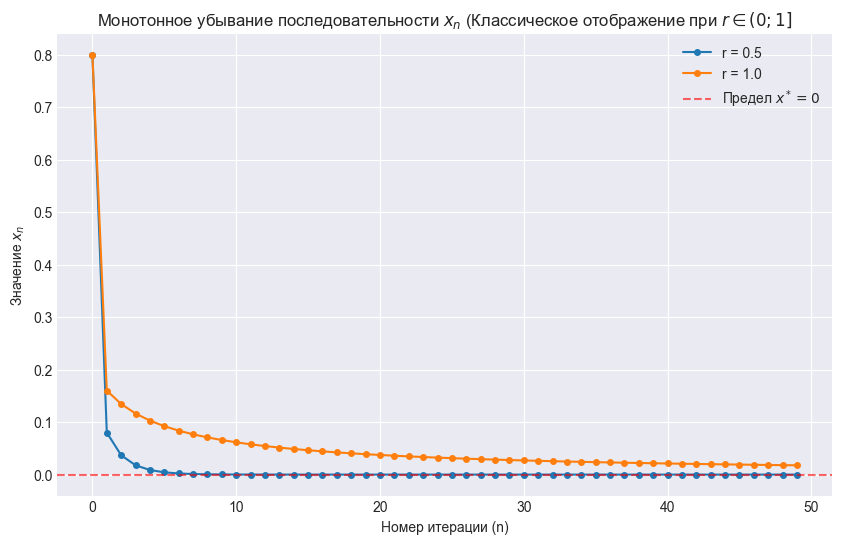

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Классическое логистическое отображение
def logistic_map(x, r):
    return r * x * (1 - x)

# Параметры симуляции для демонстрации монотонного убывания
n_iterations = 50   # Количество шагов
x0 = 0.8            # Начальное условие (ближе к 1, чтобы было видно убывание)

# Выбираем r <= 1
r_values = [0.5, 1.0]

plt.figure(figsize=(10, 6))

for r in r_values:
    x_history = [x0]
    curr_x = x0
    for n in range(1, n_iterations):
        curr_x = logistic_map(curr_x, r)
        x_history.append(curr_x)
    
    # Строим график x_n от n
    plt.plot(range(n_iterations), x_history, 'o-', markersize=4, label=f'r = {r}')

# Добавляем линию предела
plt.axhline(y=0, color='r', linestyle='--', alpha=0.6, label='Предел $x^*=0$')

# Оформление
plt.title('Монотонное убывание последовательности $x_n$ (Классическое отображение при $r \\in (0; 1]$')
plt.xlabel('Номер итерации (n)')
plt.ylabel('Значение $x_n$')
plt.legend()
plt.grid(True)
plt.show()

### N.3 Монотонность подпоследовательностей при $r \in (2; 3)$
**Задание:** Определить монотонность подпоследовательностей $\{x_{2n}\}$ и $\{x_{2n+1}\}$ при $r \in (2; 3)$, когда траектория осциллирует вокруг неподвижной точки $x^*$.

**1. Нахождение неподвижной точки $x^*$ и ее устойчивости:**
Неподвижная точка: $x^* = 1 - 1/r$.
Поскольку $r \in (2; 3)$, то $x^* \in (1/2; 2/3)$.
Устойчивость определяется производной $f'(x^*)$:
$$f'(x) = r(1 - 2x) \implies f'(x^*) = r(1 - 2(1 - 1/r)) = 2 - r$$
Поскольку $r \in (2; 3)$, то $f'(x^*) \in (-1; 0)$.
Так как $|f'(x^*)| < 1$, точка **$x^*$ устойчива** (притягивает).
Так как $f'(x^*) < 0$, сходимость к $x^*$ **осциллирующая** (переменные знаки), что подтверждает условие $x_{2n} > x^*$ и $x_{2n+1} < x^*$.

**2. Доказательство монотонности подпоследовательностей:**
Монотонность подпоследовательностей определяется устойчивостью $x^*$ относительно **двукратного отображения** $f^2(x)$. Используем производную второго порядка:
$$(f^2)'(x^*) = (f'(x^*))^2$$
Так как $f'(x^*) \in (-1; 0)$, то:
$$(f^2)'(x^*) = (2 - r)^2 \in (0; 1)$$
Поскольку $(f^2)'(x^*) > 0$, подход к $x^*$ по подпоследовательностям является **монотонным** (не осциллирующим).

* **Для $\{x_{2n}\}$ (четные члены):**
    Так как $x_{2n} > x^*$ (начинается выше) и подход монотонный, последовательность должна **убывать** к $x^*$.
    **Вывод:** $\{x_{2n}\}$ **монотонно убывает**.

* **Для $\{x_{2n+1}\}$ (нечетные члены):**
    Так как $x_{2n+1} < x^*$ (начинается ниже) и подход монотонный, последовательность должна **возрастать** к $x^*$.
    **Вывод:** $\{x_{2n+1}\}$ **монотонно возрастает**.

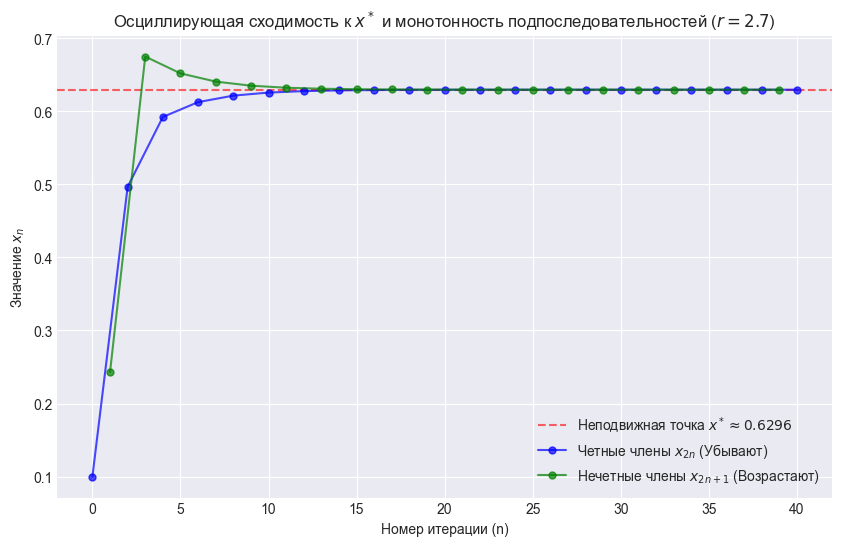

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Классическое логистическое отображение
def logistic_map(x, r):
    return r * x * (1 - x)

# Параметры симуляции
r = 2.7
n_iterations = 40
x0 = 0.1 # Начальное условие

# Расчет траектории
x_history = [x0]
curr_x = x0
for n in range(n_iterations):
    curr_x = logistic_map(curr_x, r)
    x_history.append(curr_x)

# Расчет неподвижной точки
x_star = 1 - 1/r

# Разделяем на подпоследовательности
indices = np.arange(len(x_history))
x_all = np.array(x_history)

# Четные члены (x0, x2, x4, ...)
x_even = x_all[indices % 2 == 0]
n_even = indices[indices % 2 == 0]

# Нечетные члены (x1, x3, x5, ...)
x_odd = x_all[indices % 2 != 0]
n_odd = indices[indices % 2 != 0]

plt.figure(figsize=(10, 6))

# Рисуем осевую линию (неподвижную точку)
plt.axhline(y=x_star, color='r', linestyle='--', alpha=0.6, label=f'Неподвижная точка $x^* \\approx {x_star:.4f}$')

# Рисуем четные члены (должны убывать)
plt.plot(n_even, x_even, 'o-', color='blue', alpha=0.7, markersize=5, label='Четные члены ${x_{2n}}$ (Убывают)')

# Рисуем нечетные члены (должны возрастать)
plt.plot(n_odd, x_odd, 'o-', color='green', alpha=0.7, markersize=5, label='Нечетные члены ${x_{2n+1}}$ (Возрастают)')

# Оформление
plt.title('Осциллирующая сходимость к $x^*$ и монотонность подпоследовательностей ($r=2.7$)')
plt.xlabel('Номер итерации (n)')
plt.ylabel('Значение $x_n$')
plt.legend()
plt.grid(True)
plt.show()

## Анализ варианта N=2
**Функция:** $x_{n+1} = g(x_n) = r x_n (1 - x_n)^2$

### N.4.1 Аналитический поиск неподвижной точки
Решаем уравнение $x = g(x)$:
$$x = r x (1 - x)^2$$

1.  Очевидный корень: **$x^*_1 = 0$**.
2.  При $x \ne 0$ делим на $x$:
    $$1 = r (1 - x)^2 \implies (1 - x)^2 = \frac{1}{r}$$
    Извлекаем корень:
    $$1 - x = \pm \frac{1}{\sqrt{r}} \implies x = 1 \mp \frac{1}{\sqrt{r}}$$

Получаем два корня уравнения:
$$x_2 = 1 - \frac{1}{\sqrt{r}}, \quad x_3 = 1 + \frac{1}{\sqrt{r}}$$

* Корень $x_3$ всегда больше 1, поэтому он не принадлежит области определения динамической системы.
* Корень **$x^* = 1 - \frac{1}{\sqrt{r}}$** является нетривиальной неподвижной точкой. Он существует (положителен) при условии $\sqrt{r} > 1 \implies r > 1$.

**Ответ:** Неподвижная точка (аттрактор) равна $x^* = 1 - \frac{1}{\sqrt{r}}$ при $r > 1$.

### N.4.2 Диапазон монотонной сходимости к нулю
Чтобы последовательность сходилась к нулю, необходимо, чтобы $x^*=0$ была единственной устойчивой точкой, а нетривиальная точка либо отсутствовала, либо была неустойчивой.

Условие отсутствия нетривиальной точки на $(0, 1]$: $r \le 1$.
Проверим условие монотонного убывания $x_{n+1} < x_n$:
$$r x_n (1 - x_n)^2 < x_n$$
$$r (1 - x_n)^2 < 1$$

При $x \to 0$, $(1-x)^2 \to 1$. Следовательно, для сходимости к нулю в окрестности начала координат необходимо **$r < 1$**.

**Вывод:** При $r \in [0; 1]$ система монотонно сходится к нулю.

### N.4.3 Графики зависимости xn от n для нескольких различных значений параметра r:

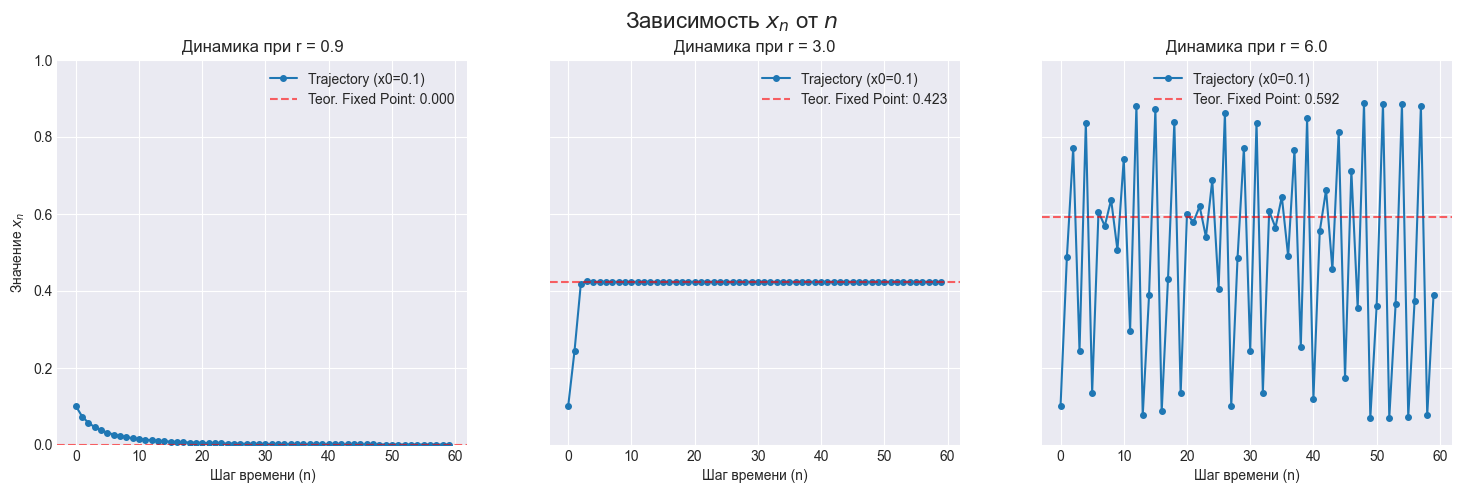

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Задаем функцию варианта
def variant_map(x, r):
    return r * x * (1 - x)**2

# 2. Функция для расчета теоретической неподвижной точки
def get_theoretical_fixed_point(r):
    if r <= 1:
        return 0.0
    else:
        return 1 - 1/np.sqrt(r)

# 3. Параметры симуляции
n_iterations = 60   # Сколько шагов делать
x0 = 0.1            # Начальное значение

# Выберем 3 значения r для демонстрации разных режимов:
# r=0.9: Вымирание (сходимость к 0)
# r=3.0: Стабилизация (сходимость к константе)
# r=6.0: Колебания или хаос
r_values = [0.9, 3.0, 6.0]

# Настройка графиков
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, r in enumerate(r_values):
    # Массивы для хранения истории (x) и времени (n)
    x_history = [x0]
    n_history = [0]
    
    curr_x = x0
    for n in range(1, n_iterations):
        curr_x = variant_map(curr_x, r)
        x_history.append(curr_x)
        n_history.append(n)
        
    # Строим график траектории
    axes[i].plot(n_history, x_history, 'o-', markersize=4, label=f'Trajectory (x0={x0})')
    
    # Считаем и рисуем теоретический уровень
    fixed_point = get_theoretical_fixed_point(r)
    axes[i].axhline(y=fixed_point, color='r', linestyle='--', alpha=0.6, label=f'Teor. Fixed Point: {fixed_point:.3f}')
    
    # Оформление
    axes[i].set_title(f'Динамика при r = {r}')
    axes[i].set_xlabel('Шаг времени (n)')
    if i == 0:
        axes[i].set_ylabel('Значение $x_n$')
    axes[i].set_ylim(0, 1)
    axes[i].grid(True)
    axes[i].legend()

plt.suptitle('Зависимость $x_n$ от $n$ ', fontsize=16)
plt.show()

### Выводы по графикам:
1.  **При $r=0.9$:** Наблюдается монотонное убывание. Популяция вымирает ($x_n \to 0$), что совпадает с теоретическим предсказанием (так как $r < 1$).
2.  **При $r=3.0$:** Система сходится к теоретически рассчитанной точке $x^* = 1 - 1/\sqrt{3} \approx 0.42$. График "прилипает" к красной пунктирной линии.
3.  **При $r=6.0$:** Сходимость к одной точке пропадает, начинаются колебания (циклы). Система переходит в более сложный режим.

# Hard Level: Неподвижная точка крастности m, период цикла и лестница Ламерея

###

### H.1.1 Положим $r_{\infty} \approx 3.5699456...$ Как изменяется длина цикла при $r \in (3; r_{\infty})$?

Теоретическое обоснование:
В диапазоне $r \in (3; r_{\infty})$ логистическое отображение $x_{n+1} = r x_n (1 - x_n)$ демонстрирует явление, известное как каскад бифуркаций удвоения периода (или сценарий Фейгенбаума).

1.  При $r < 3$ система имеет одну устойчивую неподвижную точку (цикл периода $2^0 = 1$).
2.  В точке $r_1 = 3$ происходит первая бифуркация: неподвижная точка теряет устойчивость, и рождается устойчивый цикл периода $2^1 = 2$. Система начинает колебаться между двумя значениями.
3.  При дальнейшем увеличении $r$, в некоторой точке $r_2 \approx 3.449$, цикл периода 2 теряет устойчивость, порождая устойчивый цикл периода $2^2 = 4$.
4.  Этот процесс продолжается бесконечно при приближении $r$ к критическому значению $r_{\infty}$ (точка накопления).

Таким образом, длина цикла $m$ изменяется по закону геометрической прогрессии:
$$m = 2^k, \quad k \in \mathbb{N}$$
То есть последовательность длин циклов выглядит как: $2 \rightarrow 4 \rightarrow 8 \rightarrow 16 \rightarrow \dots$

Для подтверждения построим фрагмент бифуркационной диаграммы в указанном диапазоне.

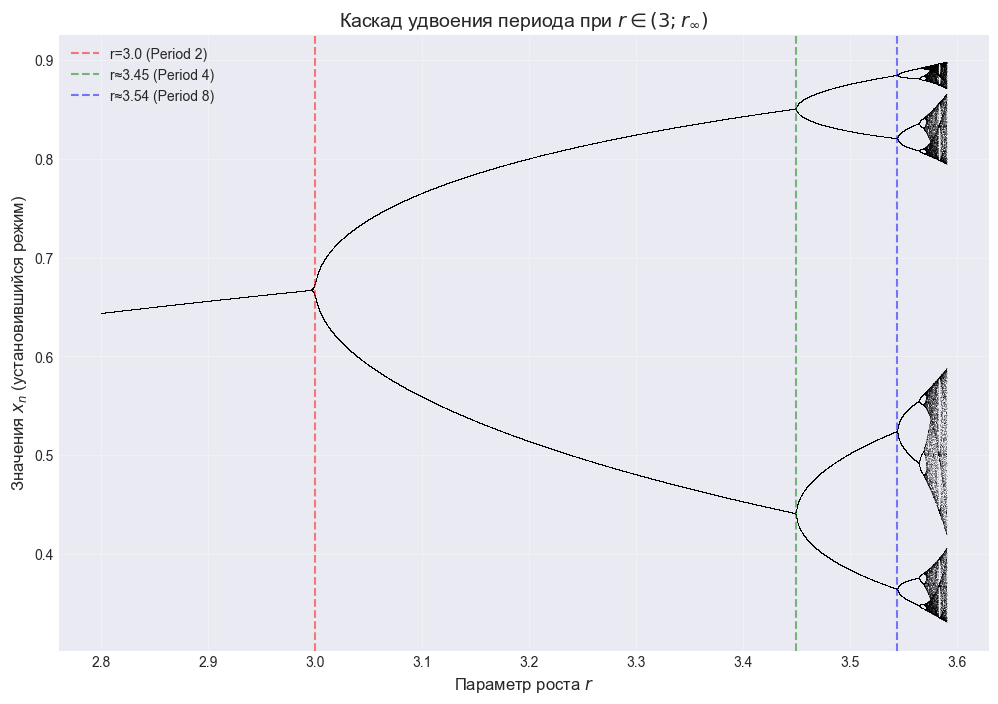

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(r, x):
    """Функция логистического отображения."""
    return r * x * (1 - x)

def plot_bifurcation_zoom(r_min, r_max, title):
    # Параметры симуляции
    n_r = 10000       # Количество точек по оси r (разрешение)
    iterations = 1000 # Общее количество итераций
    last = 100        # Сколько последних точек берем для построения (установившийся режим)
    
    # Генерируем массив значений r
    r = np.linspace(r_min, r_max, n_r)
    
    # Начальное значение x (произвольное из (0, 1))
    x = 0.5 * np.ones(n_r)
    
    # Прогоняем "холостые" итерации, чтобы система пришла к аттрактору (циклу)
    for i in range(iterations):
        x = logistic_map(r, x)
        
    # Подготовка графика
    plt.figure(figsize=(12, 8))
    
    # Рисуем только последние итерации (установившийся режим)
    for i in range(last):
        x = logistic_map(r, x)
        plt.plot(r, x, ',k', alpha=0.25) # ',k' рисует микро-пиксели черного цвета
        
    plt.title(title, fontsize=14)
    plt.xlabel('Параметр роста $r$', fontsize=12)
    plt.ylabel('Значения $x_n$ (установившийся режим)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Отметим приблизительные точки бифуркации для наглядности
    plt.axvline(x=3.0, color='r', linestyle='--', alpha=0.5, label='r=3.0 (Period 2)')
    plt.axvline(x=3.449, color='g', linestyle='--', alpha=0.5, label='r≈3.45 (Period 4)')
    plt.axvline(x=3.544, color='b', linestyle='--', alpha=0.5, label='r≈3.54 (Period 8)')
    
    plt.legend()
    plt.show()

# Запускаем построение для диапазона из задания
r_infinity = 3.5699456
plot_bifurcation_zoom(2.8, r_infinity + 0.02, "Каскад удвоения периода при $r \\in (3; r_{\\infty})$")

### Вывод по заданию H.1.1

На основе теоретического анализа и построенной бифуркационной диаграммы можно дать **следующий ответ:**

При изменении параметра $r$ в интервале $(3; r_{\infty})$ длина устойчивого цикла $m$ удваивается при прохождении через точки бифуркации. 
Длина цикла принимает значения последовательности степеней двойки:
$$m = 2, 4, 8, 16, 32, \dots$$

Это явление называется каскадом удвоения периода. Чем ближе $r$ приближается к значению $r_{\infty}$ (границе хаоса), тем чаще происходят бифуркации, и длина цикла стремится к бесконечности.

### H.1.2 Экспериментальное установление ограничений на m

Задание:
Для $r \in (3; r_{\infty})$ экспериментально установите, какие ограничения действуют на $m$.
Согласно примечанию, необходимо выделить закономерность изменения длины цикла.

Гипотеза:
Исходя из теории каскада бифуркаций, мы ожидаем, что в данном диапазоне существуют только циклы длины $2^k$. Любые другие значения $m$ (нечетные или не являющиеся чистой степенью двойки) невозможны до наступления хаоса.

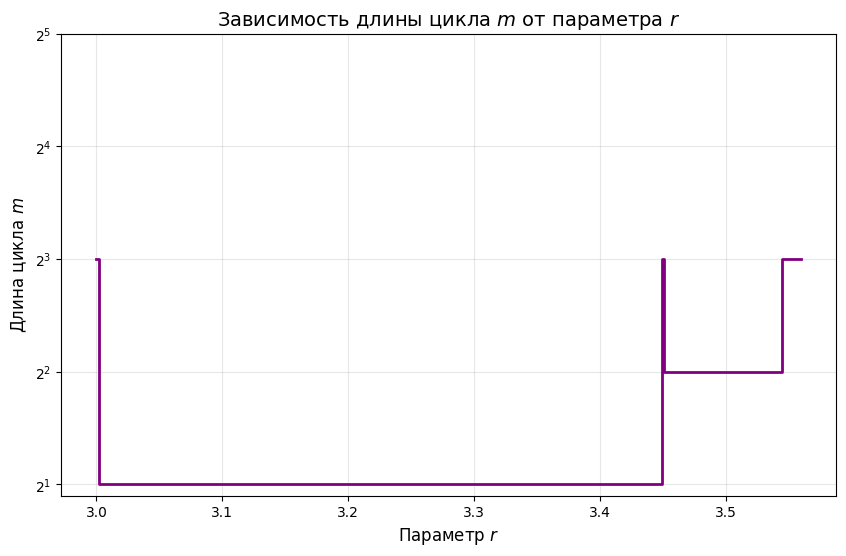

Обнаруженные длины циклов в эксперименте: [2 4 8]


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def get_cycle_period(r, iterations=2000, last=200, tol=1e-4):
    """
    Определяет период цикла для заданного r.
    
    Parameters:
    - r: параметр логистического отображения
    - iterations: сколько итераций прогнать всего
    - last: сколько последних точек анализировать
    - tol: допуск для сравнения чисел (float precision)
    
    Returns:
    - m: количество уникальных точек (период цикла)
    """
    x = 0.5
    # 1. Прогоняем переходный процесс
    for _ in range(iterations - last):
        x = r * x * (1 - x)
        
    # 2. Собираем "хвост" последовательности
    trajectory = []
    for _ in range(last):
        x = r * x * (1 - x)
        trajectory.append(x)
    
    trajectory = np.array(trajectory)
    
    # 3. Считаем уникальные точки с учетом погрешности округления
    # Округляем до 4 знака, чтобы убрать шум float
    unique_points = np.unique(np.round(trajectory, decimals=4))
    
    return len(unique_points)

# Настройка диапазона эксперимента
# r_infinity ~ 3.5699, берем диапазон чуть не доходя до хаоса, 
# так как там период устремляется в бесконечность и считать его численно сложно
r_values = np.linspace(3.0, 3.56, 300) 
periods = []

for r in r_values:
    m = get_cycle_period(r)
    periods.append(m)

# Визуализация
plt.figure(figsize=(10, 6))
plt.step(r_values, periods, where='post', color='purple', linewidth=2)
plt.title('Зависимость длины цикла $m$ от параметра $r$', fontsize=14)
plt.xlabel('Параметр $r$', fontsize=12)
plt.ylabel('Длина цикла $m$', fontsize=12)
plt.yscale('log', base=2) # Логарифмическая шкала по основанию 2 - самая наглядная здесь!
plt.grid(True, which="both", ls="-", alpha=0.3)

# Подпишем уровни на оси Y
plt.yticks([2, 4, 8, 16, 32], [r'$2^1$', r'$2^2$', r'$2^3$', r'$2^4$', r'$2^5$'])

plt.show()

# Вывод найденных уникальных значений периодов
print(f"Обнаруженные длины циклов в эксперименте: {np.unique(periods)}")

### Вывод по заданию H.1.2

Экспериментально установлено, что в диапазоне $r \in (3; r_{\infty})$ на длину цикла $m$ накладывается жёсткое ограничение. Длина цикла принимает значения исключительно из множества степеней двойки:

$$m \in \{ 2^k \mid k \in \mathbb{N} \}$$

То есть $m$ может быть равным $2, 4, 8, 16, \dots$.
Циклы с периодами, не представимыми в виде $2^k$ (например, 3, 5, 6, 7), в данном диапазоне параметров отсутствуют. Они появляются только при $r > r_{\infty}$ (в окнах периодичности внутри зоны хаоса).

Это подтверждает теорию о том, что путь к хаосу в логистическом отображении лежит через бесконечную последовательность бифуркаций удвоения периода.

### H.2.1 Визуализация циклов: Лестница Ламерея

**Задание 1:** Написать функцию для построения лестницы Ламерея (Cobweb Plot).

**Назначение:** Метод Лестницы Ламерея позволяет графически проследить эволюцию траектории $x_n$ в динамической системе. Он наглядно демонстрирует, как система переходит от сходимости к точке к циклическому (периодическому) или хаотическому режиму.

**Метод построения:**
Траектория строится по следующему правилу:
1.  Старт из $x_n$ на оси $x$.
2.  **Вертикальный отрезок** до кривой функции $f(x)$. Точка пересечения дает $x_{n+1}$.
3.  **Горизонтальный отрезок** от $f(x)$ до диагональной линии $y=x$ (биссектрисы). Это переносит значение $x_{n+1}$ обратно на ось $x$.
4.  Повторение.

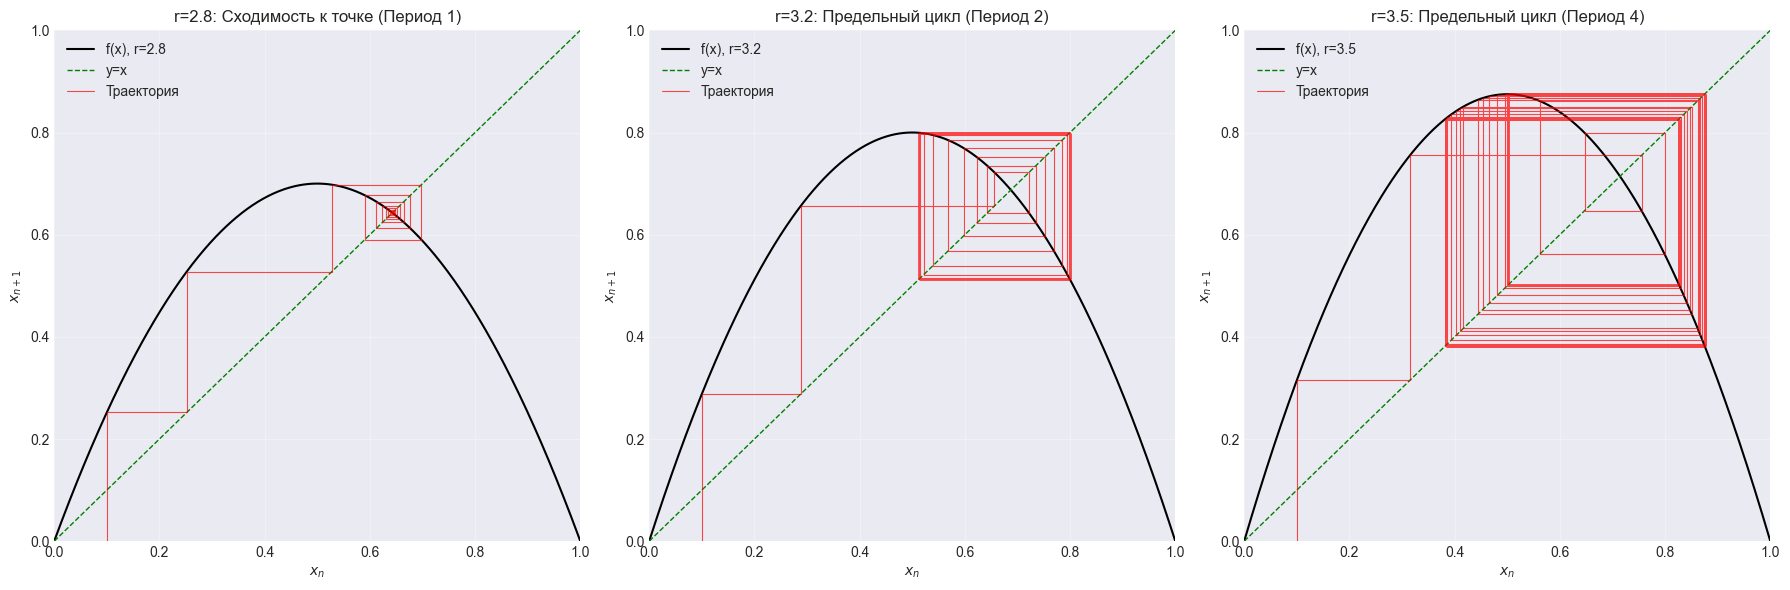

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def plot_lamerey(r, x0, n_iter=100, ax=None):
    """
    Строит лестницу Ламерея для логистического отображения.
    
    Параметры:
    - r: параметр r
    - x0: начальная точка
    - n_iter: количество итераций
    - ax: объект осей matplotlib
    """
    # Если оси не переданы, создаем новые
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))
    
    # 1. Рисуем фоновые графики: параболу и диагональ y=x
    x_vals = np.linspace(0, 1, 500)
    y_vals = r * x_vals * (1 - x_vals)
    
    ax.plot(x_vals, y_vals, 'k', linewidth=1.5, label=f'f(x), r={r}') # Парабола
    ax.plot([0, 1], [0, 1], 'g--', linewidth=1, label='y=x') # Диагональ
    
    # 2. Строим траекторию (лестницу)
    # Алгоритм: (x0,0) -> (x0, x1) -> (x1, x1) -> (x1, x2) ...
    
    # Массивы для координат точек лестницы
    px = []
    py = []
    
    # Стартуем с (x0, 0)
    x_curr = x0
    px.append(x_curr)
    py.append(0)
    
    for _ in range(n_iter):
        # Шаг 1: Вертикально до параболы: (x_n, x_n) -> (x_n, x_{n+1})
        # Значение функции: x_next = f(x_curr)
        x_next = r * x_curr * (1 - x_curr)
        
        px.append(x_curr)
        py.append(x_next)
        
        # Шаг 2: Горизонтально до диагонали: (x_n, x_{n+1}) -> (x_{n+1}, x_{n+1})
        px.append(x_next)
        py.append(x_next)
        
        # Обновляем текущий x
        x_curr = x_next
        
    # Рисуем лестницу
    ax.plot(px, py, 'r-', linewidth=0.8, alpha=0.7, label='Траектория')
    
    # Оформление
    ax.set_title(f'Лестница Ламерея: r = {r}', fontsize=12)
    ax.set_xlabel('$x_n$', fontsize=10)
    ax.set_ylabel('$x_{n+1}$', fontsize=10)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.legend()
    ax.grid(True, alpha=0.3)

# Демонстрация работы функции для разных режимов (для наглядности выводов)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Цикл периода 1 (Устойчивая точка)
plot_lamerey(r=2.8, x0=0.1, n_iter=50, ax=axes[0])
axes[0].set_title("r=2.8: Сходимость к точке (Период 1)")

# 2. Цикл периода 2 (Прямоугольник)
plot_lamerey(r=3.2, x0=0.1, n_iter=50, ax=axes[1])
axes[1].set_title("r=3.2: Предельный цикл (Период 2)")

# 3. Цикл периода 4 (Сложный контур)
plot_lamerey(r=3.5, x0=0.1, n_iter=100, ax=axes[2])
axes[2].set_title("r=3.5: Предельный цикл (Период 4)")

plt.tight_layout()
plt.show()

### H.2.2 Анализ графиков: как выглядят циклы различных порядков

Используя построенные лестницы Ламерея, можно сделать следующие выводы о визуальном представлении установившихся режимов:

1.  Неподвижная точка (Период 1):
    Траектория выглядит как "лестница" или "спираль", которая закручивается и сходится в одну точку пересечения параболы $y=f(x)$ и диагонали $y=x$. После определенного числа итераций линия перестает двигаться.

2.  Цикл периода 2:
    Установившийся режим выглядит как замкнутый прямоугольный контур (квадрат).
    * Вершина прямоугольника лежит на параболе справа (точка максимума цикла).
    * Противоположная вершина лежит на параболе слева (точка минимума цикла).
    * Траектория бесконечно обходит этот прямоугольник: вверх-влево-вниз-вправо.

3.  Цикл периода 4:
    Траектория представляет собой более сложную замкнутую ломаную линию. Визуально это выглядит как два переплетенных прямоугольника или "спираль", которая замыкается сама на себя через каждые 4 касания параболы.

4.  Хаотический режим (для справки):
    При больших $r$ (например, $r=3.9$) замкнутых фигур не образуется. Линия траектории хаотично заполняет пространство между диагональю и параболой, образуя густую "паутину", никогда не повторяя свой путь.

### H.3 Лестница Ламерея для функции N=2

Пронаблюдаем, как изменяется длина цикла заданного вариантом отображения g(xn) с изменением параметра r:

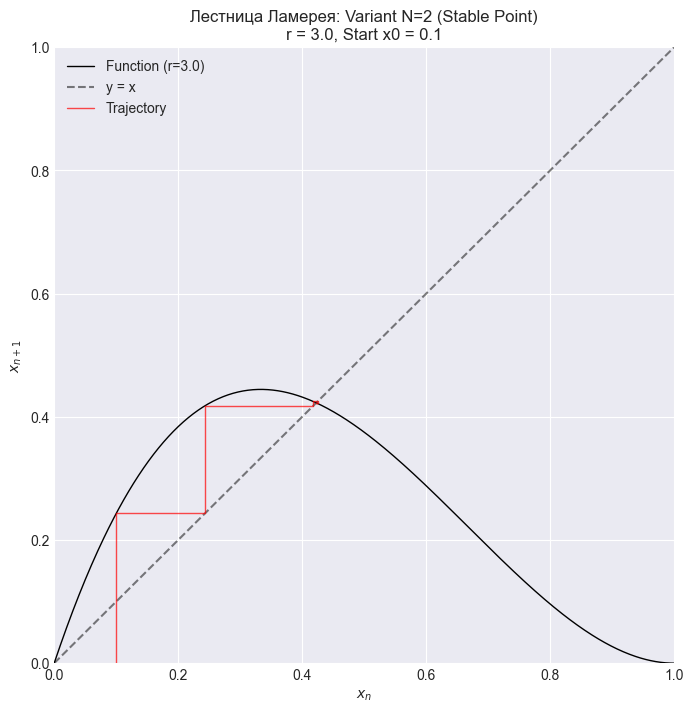

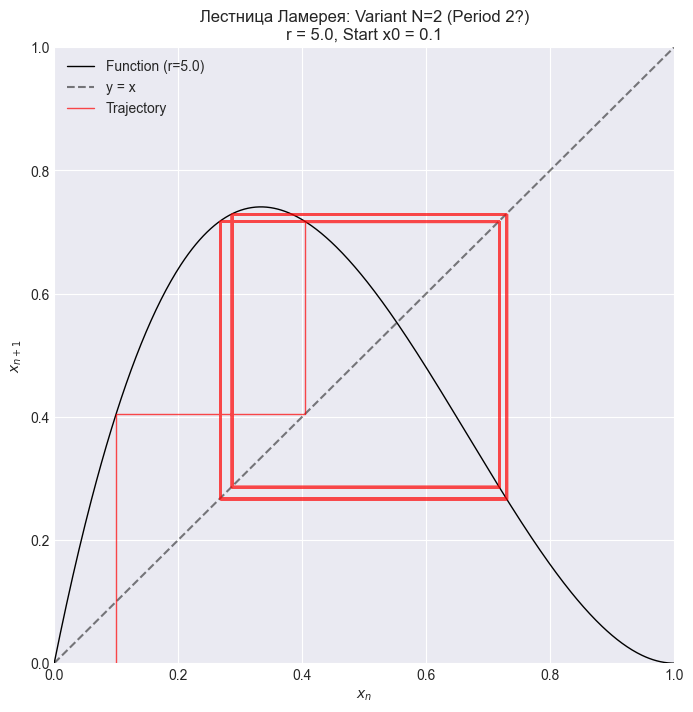

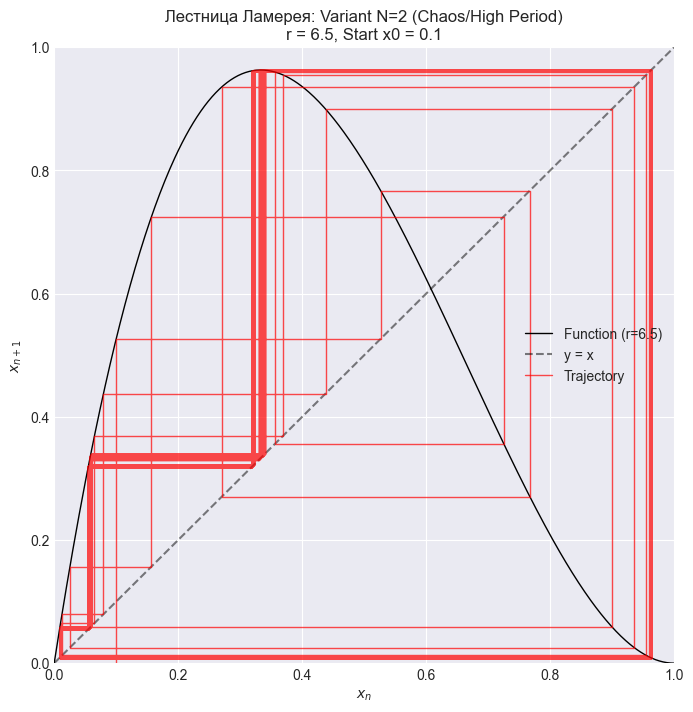

In [39]:
import matplotlib.pyplot as plt
import numpy as np

def plot_lamerey(mapping_func, r, x0, n_iterations=100, title_suffix=""):
    """
    Функция для построения лестницы Ламерея.
    mapping_func: функция отображения (например, logistic_map)
    r: параметр r
    x0: начальное условие
    n_iterations: количество шагов
    """
    # 1. Подготовка данных для кривой функции
    x_plot = np.linspace(0, 1, 500)
    y_plot = mapping_func(x_plot, r)
    
    # 2. Расчет траектории (паутины)
    x_vals = [x0]
    y_vals = [0]
    
    curr_x = x0
    for _ in range(n_iterations):
        # Шаг 1: вертикально до кривой
        next_x = mapping_func(curr_x, r)
        x_vals.append(curr_x)
        y_vals.append(next_x)
        
        # Шаг 2: горизонтально до диагонали y=x
        x_vals.append(next_x)
        y_vals.append(next_x)
        
        curr_x = next_x
        
    # 3. Рисуем график
    plt.figure(figsize=(8, 8))
    
    # Сама функция (парабола или кривая)
    plt.plot(x_plot, y_plot, 'k', linewidth=1, label=f'Function (r={r})')
    
    # Диагональ y = x
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='y = x')
    
    # Лестница Ламерея
    plt.plot(x_vals, y_vals, 'r', alpha=0.7, linewidth=1, label='Trajectory')
    
    # Оформление
    plt.title(f'Лестница Ламерея: {title_suffix}\nr = {r}, Start x0 = {x0}')
    plt.xlabel('$x_n$')
    plt.ylabel('$x_{n+1}$')
    plt.grid(True)
    plt.legend()
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.show()

# Определим функции отображения
def logistic_map(x, r):
    return r * x * (1 - x)

def variant_map(x, r):
    return r * x * (1 - x)**2

    # 1. Устойчивая точка (нет цикла)
# При r=3.0 мы видели сходимость
plot_lamerey(variant_map, r=3.0, x0=0.1, n_iterations=50, title_suffix="Variant N=2 (Stable Point)")

# 2. Поиск цикла периода 2
# Попробуем увеличить r. Например, r=5.0
plot_lamerey(variant_map, r=5.0, x0=0.1, n_iterations=50, title_suffix="Variant N=2 (Period 2?)")

# 3. Поиск цикла более высокого порядка или хаоса
# Возьмем r близкое к максимуму (6.75)
plot_lamerey(variant_map, r=6.5, x0=0.1, n_iterations=200, title_suffix="Variant N=2 (Chaos/High Period)")

### Выводы по функции варианта N=2:

1.  **Наличие циклов:** Как видно из графиков лестницы Ламерея, вариант N=2 также демонстрирует переход от устойчивой точки к циклам при увеличении параметра $r$.
    * При малых $r$ траектория спиралевидно сходится в точку.
    * При увеличении $r$ (например, около $r=5.0$) возникает устойчивый цикл периода 2 (траектория бегает по замкнутому контуру).
    * При дальнейшем увеличении $r$ (ближе к 6.75) возникают циклы более высоких порядков и сложное (хаотическое) поведение.

2.  **Сходство с логистическим отображением:**
    * **Сходство:** Механизм возникновения хаоса одинаков — через каскад удвоения периода (сценарий Фейгенбаума). Графически это выглядит как усложнение замкнутых траекторий в "паутине".
    * **Различие:** Значения параметра $r$, при которых происходят бифуркации - другие. В классике хаос начинается после $r \approx 3.57$, а в варианте N=2 область циклов и хаоса смещена в сторону больших значений $r$ (вплоть до 6.75). Также форма "паутины" асимметрична из-за асимметрии функции $x(1-x)^2$.